> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>Introduction:

I am going to work on TMDb movie data,This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue


### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

i am going to answer the following questions:

1- Which genres are most popular from year to year?


2- What kinds of properties are associated with movies that have high revenues?

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [6]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [7]:
# Upgrade pandas to use dataframe.explode() function.

### Data Wrangling Steps:


1- Assesing the data:


exploring the data (head,info,shape)

In [8]:
# Load your data and print out a few lines. Perform operations to inspect data
df=pd.read_csv('tmdb-movies.csv')
#   types and look for instances of missing or possibly errant data.



In [9]:
#explore the data
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [10]:
#explore the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [11]:
#describe the data
df.describe

<bound method NDFrame.describe of            id    imdb_id  popularity     budget     revenue  \
0      135397  tt0369610   32.985763  150000000  1513528810   
1       76341  tt1392190   28.419936  150000000   378436354   
2      262500  tt2908446   13.112507  110000000   295238201   
3      140607  tt2488496   11.173104  200000000  2068178225   
4      168259  tt2820852    9.335014  190000000  1506249360   
...       ...        ...         ...        ...         ...   
10861      21  tt0060371    0.080598          0           0   
10862   20379  tt0060472    0.065543          0           0   
10863   39768  tt0060161    0.065141          0           0   
10864   21449  tt0061177    0.064317          0           0   
10865   22293  tt0060666    0.035919      19000           0   

                     original_title  \
0                    Jurassic World   
1                Mad Max: Fury Road   
2                         Insurgent   
3      Star Wars: The Force Awakens   
4             

In [12]:
#find the data shape
df.shape

(10866, 21)

### 2-Data Cleaning
 

a) drop data that are not effective in the analysis and we don't need  as (id,imdb_id ,cast,homepage,tagline,keywords,production_companies)

b)check for Null values and drop them

C)check for duplicate values and drop them

In [13]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.



In [14]:
#first drop some data that i dont need and are not effective
df.drop(['id','imdb_id','cast','homepage','tagline','keywords','production_companies'],axis=1,inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10866 non-null  float64
 1   budget          10866 non-null  int64  
 2   revenue         10866 non-null  int64  
 3   original_title  10866 non-null  object 
 4   director        10822 non-null  object 
 5   overview        10862 non-null  object 
 6   runtime         10866 non-null  int64  
 7   genres          10843 non-null  object 
 8   release_date    10866 non-null  object 
 9   vote_count      10866 non-null  int64  
 10  vote_average    10866 non-null  float64
 11  release_year    10866 non-null  int64  
 12  budget_adj      10866 non-null  float64
 13  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


In [16]:
#check for null data,and drop them if found
df.isnull().sum().any()

True

In [17]:
df.dropna(inplace=True)

In [18]:
df.isnull().sum().any()

False

In [19]:
#check for duplicates
print(df.duplicated().sum())

1


In [20]:
df.drop_duplicates(inplace=True)

In [21]:
print(df.duplicated().sum())

0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10798 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10798 non-null  float64
 1   budget          10798 non-null  int64  
 2   revenue         10798 non-null  int64  
 3   original_title  10798 non-null  object 
 4   director        10798 non-null  object 
 5   overview        10798 non-null  object 
 6   runtime         10798 non-null  int64  
 7   genres          10798 non-null  object 
 8   release_date    10798 non-null  object 
 9   vote_count      10798 non-null  int64  
 10  vote_average    10798 non-null  float64
 11  release_year    10798 non-null  int64  
 12  budget_adj      10798 non-null  float64
 13  revenue_adj     10798 non-null  float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 ( Which genres are most popular from year to year?)


In [23]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


In [24]:
#first we need to split multiple values separated by pipe (|) characters in genres
df1=df.copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10798 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10798 non-null  float64
 1   budget          10798 non-null  int64  
 2   revenue         10798 non-null  int64  
 3   original_title  10798 non-null  object 
 4   director        10798 non-null  object 
 5   overview        10798 non-null  object 
 6   runtime         10798 non-null  int64  
 7   genres          10798 non-null  object 
 8   release_date    10798 non-null  object 
 9   vote_count      10798 non-null  int64  
 10  vote_average    10798 non-null  float64
 11  release_year    10798 non-null  int64  
 12  budget_adj      10798 non-null  float64
 13  revenue_adj     10798 non-null  float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


In [25]:
df1.head()

,popularity,budget,revenue,original_title,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [26]:
df1['genres']=df1['genres'].str.split("|")


In [27]:
df_genres=df1.explode("genres")

In [28]:
df_genres.head()

,popularity,budget,revenue,original_title,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Adventure,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Science Fiction,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,An apocalyptic story set in the furthest reach...,120,Action,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [29]:
df_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26861 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      26861 non-null  float64
 1   budget          26861 non-null  int64  
 2   revenue         26861 non-null  int64  
 3   original_title  26861 non-null  object 
 4   director        26861 non-null  object 
 5   overview        26861 non-null  object 
 6   runtime         26861 non-null  int64  
 7   genres          26861 non-null  object 
 8   release_date    26861 non-null  object 
 9   vote_count      26861 non-null  int64  
 10  vote_average    26861 non-null  float64
 11  release_year    26861 non-null  int64  
 12  budget_adj      26861 non-null  float64
 13  revenue_adj     26861 non-null  float64
dtypes: float64(4), int64(5), object(5)
memory usage: 3.1+ MB


<AxesSubplot:ylabel='release_year'>

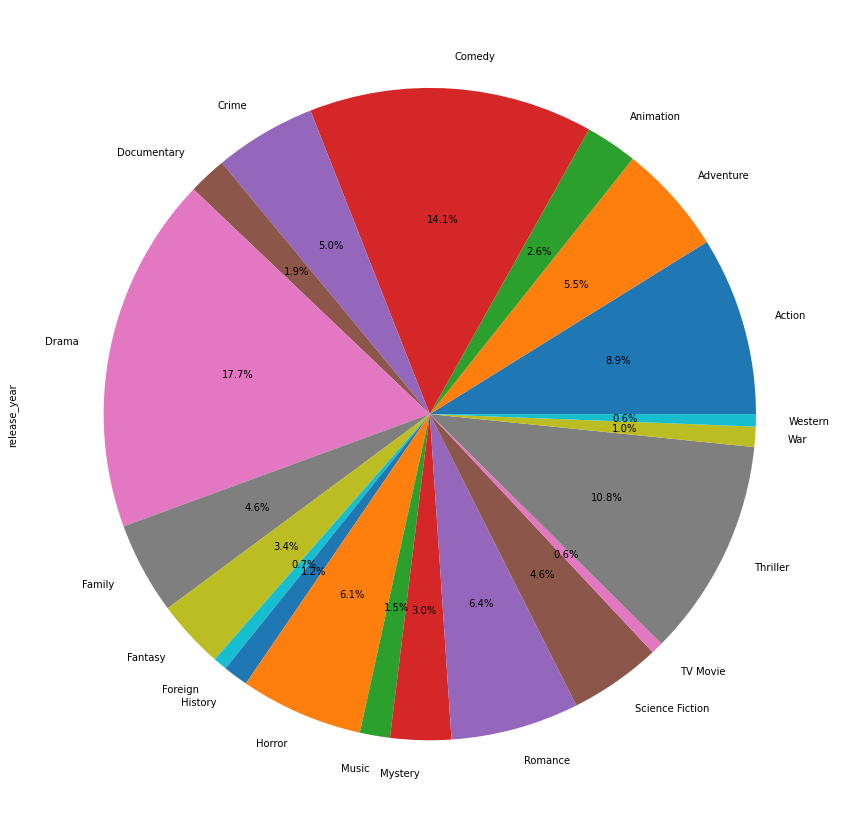

In [30]:
df_genres.groupby(['genres'])['release_year'].count().plot(kind='pie',figsize=(15,15),autopct='%1.1f%%')

###  conclusion:
Drama is the most popular genres throuh years

In [31]:
df_genres.groupby(['genres'])['release_year'].count().sort_values(ascending=False)

genres
Drama              4754
Comedy             3781
Thriller           2904
Action             2378
Romance            1707
Horror             1636
Adventure          1466
Crime              1353
Science Fiction    1223
Family             1223
Fantasy             912
Mystery             809
Animation           692
Documentary         509
Music               401
History             332
War                 270
Foreign             185
Western             164
TV Movie            162
Name: release_year, dtype: int64

### this table shows the popularity of genres through years in descending order

from this table drama is the most popular,then comedy,then thriller

In [32]:
df_genres.groupby(['release_year'])['genres'].describe()

,count,unique,top,freq
release_year,,,,
1960,78,16,Drama,13
1961,75,17,Drama,16
1962,82,17,Drama,21
1963,91,17,Comedy,13
1964,111,18,Drama,20
1965,94,18,Drama,20
1966,119,18,Drama,16
1967,97,17,Comedy,17
1968,92,17,Drama,20


### this table shows the top genre in each year,and its frequency

### Research Question 2  (What kinds of properties are associated with movies that have high revenues)  

In [33]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


Text(0.5, 1.0, 'Budget VS revenue')

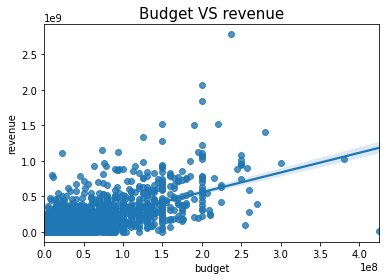

In [34]:
#relation between budget and revenue
sns.regplot(x=df["budget"],y=df["revenue"]).set_title("Budget VS revenue",size=15)


### conclusion:

as budget increase,the revenue increase

Text(0.5, 1.0, 'popularity VS revenue')

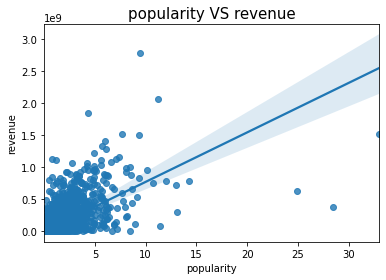

In [35]:
#the relation between popularity and revenue
sns.regplot(x=df["popularity"],y=df["revenue"]).set_title("popularity VS revenue",size=15)


### Conlusion:

as popularity increase the revenue increase

Text(0.5, 1.0, 'vote count VS revenue')

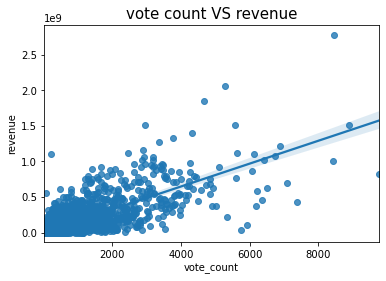

In [36]:
#the relation between vote count and revenue
sns.regplot(x=df["vote_count"],y=df["revenue"]).set_title("vote count VS revenue",size=15)


### Conclusion:

as vote count increase,the revnue increase

###  to analyse the best genres that effect revenue,take a sample for the best 50 movies in revenues

In [37]:
genres_sorted_df=df_genres.sort_values(["revenue"],ascending=False)

In [38]:
top_50_genres=genres_sorted_df.iloc[:50]

<AxesSubplot:ylabel='revenue'>

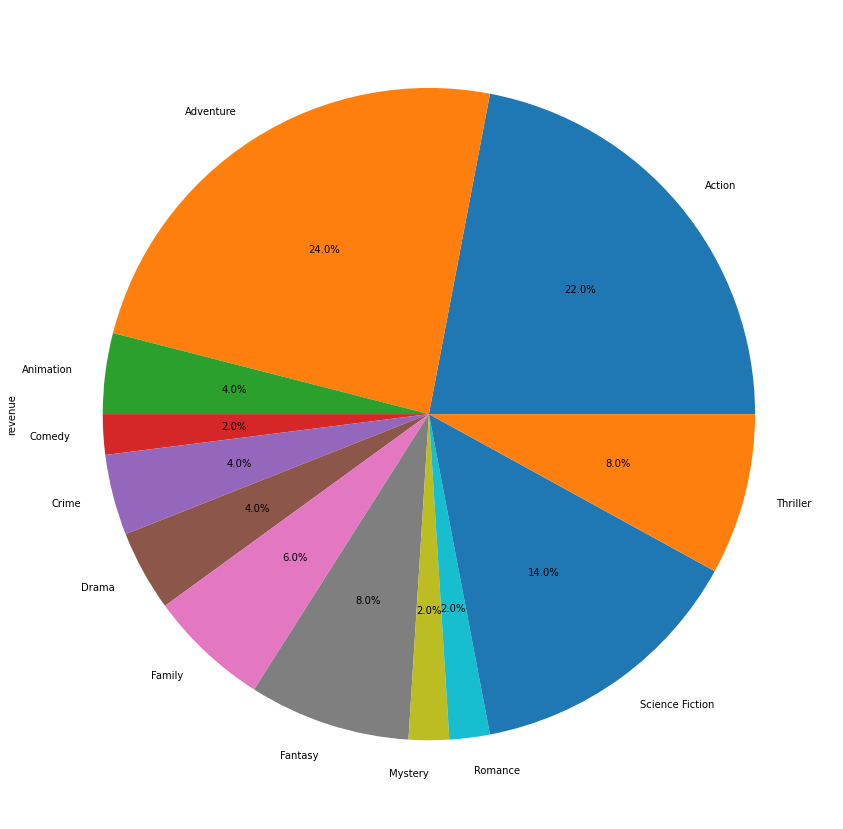

In [39]:
top_50_genres.groupby(['genres'])['revenue'].count().plot(kind='pie',figsize=(15,15),autopct='%1.1f%%')

### Conclusion:

for the top-50 movies in revenues,the most genre is adventure

###  the Top 10 movies in revenues

In [40]:
sorted_df=df.sort_values(["revenue"],ascending=False)

In [41]:
top_10=sorted_df.iloc[:10]

In [42]:
top_10['original_title']

1386                                          Avatar
3                       Star Wars: The Force Awakens
5231                                         Titanic
4361                                    The Avengers
0                                     Jurassic World
4                                          Furious 7
14                           Avengers: Age of Ultron
3374    Harry Potter and the Deathly Hallows: Part 2
5422                                          Frozen
5425                                      Iron Man 3
Name: original_title, dtype: object

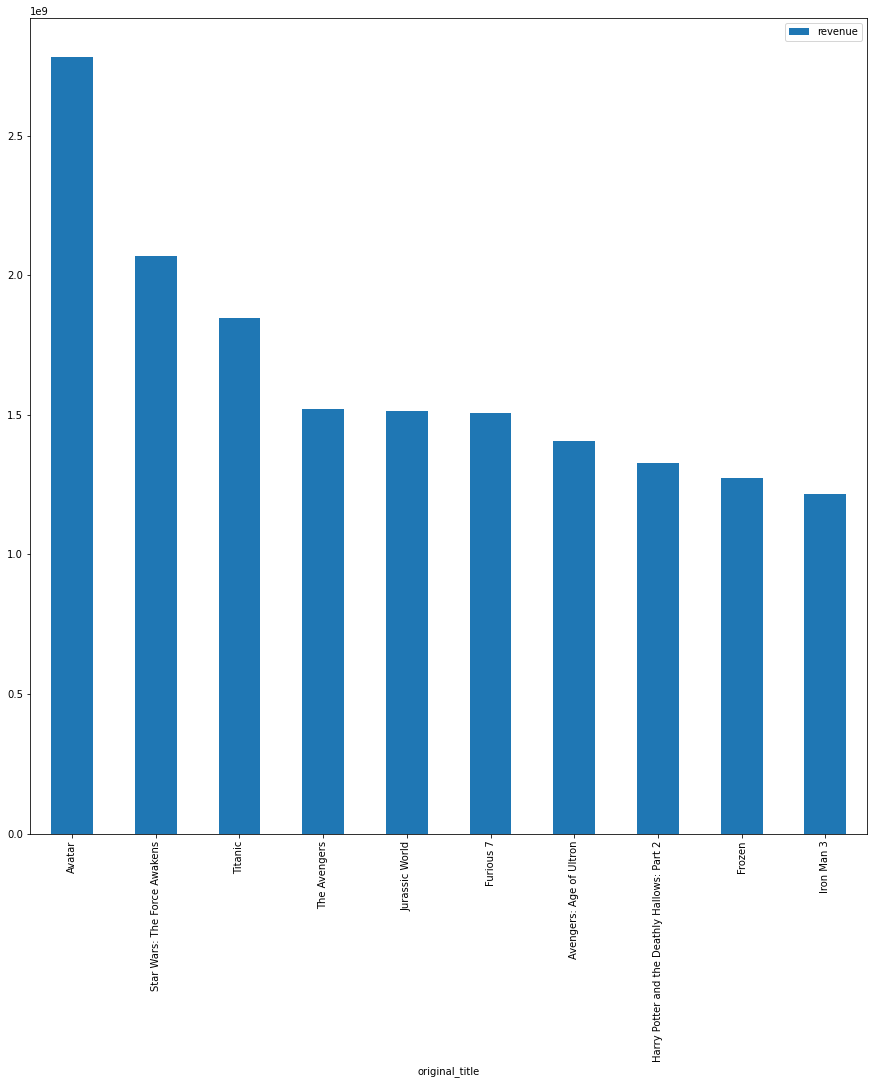

In [43]:
top_10.plot(x='original_title',y='revenue',kind='bar',figsize=(15,15));

### Conclusion:

the highest movie in revenues is (Avatar)

### conlusions
1- the most popular genres are :drama then comedy then thriller


2- properties associated with movies that have high revenues:

popularity is the most,then the vote count then the budget

for the highest 50 movies,the most genres is adventure,then action,then sciencefiction


### Limitations:

1- There is some Null values that have been deleted,this may effect the results

2- there is duplicated values that have been deleted,this may effect the results

3- We have used TMBD Movies dataset for our analysis and worked first on genres(find popular genres through years),revenue(finding the relation between budget,popularity,votings,genres on revenue),Our analysis is limited to only the provided dataset.

4-There is no normalization or exchange rate or currency conversion is considered during this analysis and our analysis is limited to the numerical values of revenue.

5- to find the best genres that affect the revenue ,i took a sample of the best 50 movies in revenues ,to find the portion of each genres in revenues 

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.


> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

### Limitations
> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!